# Acknowledgements

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

https://www.youtube.com/watch?v=Qq2X-K2Ku3s

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
print("Train data shape: ", train.shape)
print("Test data shape: ", test.shape)

Train data shape:  (1460, 81)
Test data shape:  (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
plt.style.use(style="ggplot")
plt.rcParams["figure.figsize"] = {10, 6}

In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


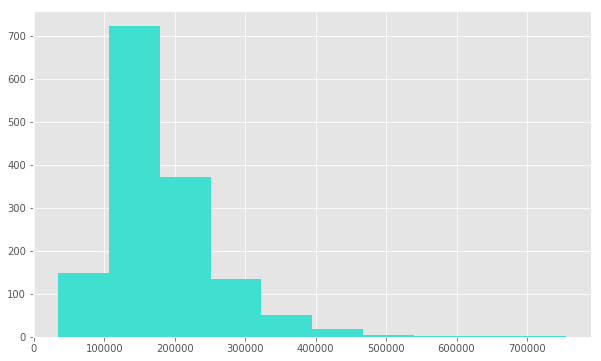

In [7]:
print("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color="turquoise")
plt.show() # The distribution is positively skewed

Skew is: 0.12133506220520406


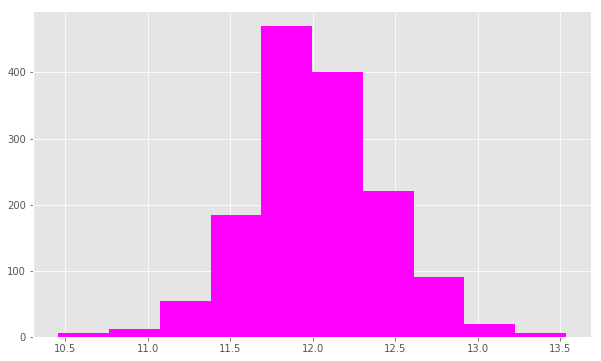

In [8]:
target = np.log(train.SalePrice)
print("Skew is:", target.skew())
plt.hist(target, color="magenta")
plt.show() # skewness of data is improved if skewness is closer to zero
# Now there's a normal distribution (has skewness is close to zero)

In [9]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr["SalePrice"].sort_values(ascending=False)[:5])
# Five features most positively correlated with SalePrice
print(corr["SalePrice"].sort_values(ascending=False)[-5:])
# Five features most negatively correlated with SalePrice

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


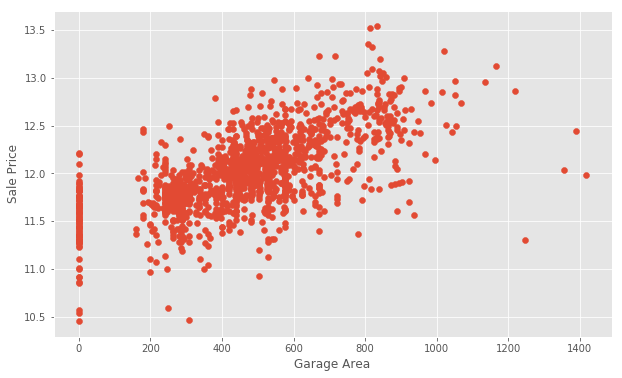

In [10]:
plt.scatter(x=train["GarageArea"], y=target)
plt.ylabel("Sale Price")
plt.xlabel("Garage Area")
plt.show()

In [11]:
train = train[train["GarageArea"] < 1200]
# Creates a new Data Frame and gets rid of outliers

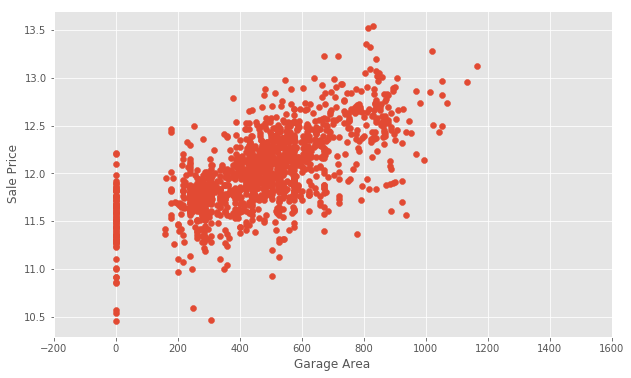

In [12]:
plt.scatter(x=train["GarageArea"], y=np.log(train.SalePrice))
plt.xlim(-200, 1600)
plt.ylabel("Sale Price")
plt.xlabel("Garage Area")
plt.show()

In [13]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ["Null Count"]
nulls.index.name = "Feature"
print(nulls)

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [14]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()
# count = non null values
# unique = unique values (only happen once)
# top = most common value & freq = how many times that value appears

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [15]:
print("Original:")
train.Street.value_counts()

Original:


Pave    1450
Grvl       5
Name: Street, dtype: int64

In [16]:
train["EncStreet"] = pd.get_dummies(train.Street, drop_first=True)
test["EncStreet"] = pd.get_dummies(train.Street, drop_first=True)
print("Encoded:")
train.EncStreet.value_counts()

Encoded:


1    1450
0       5
Name: EncStreet, dtype: int64

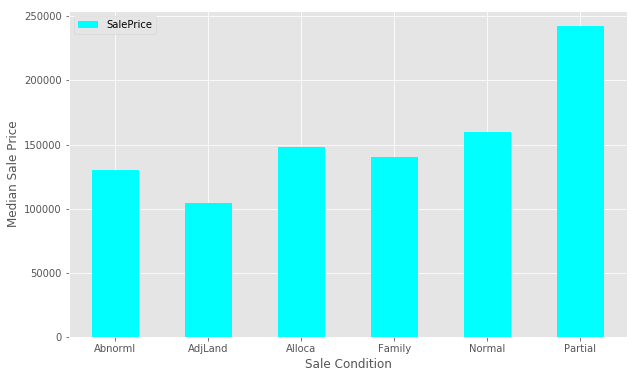

In [17]:
condition_pivot = train.pivot_table(index="SaleCondition", values="SalePrice", aggfunc=np.median)
condition_pivot.plot(kind="bar", color="aqua")
plt.xlabel("Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=0)
plt.show()

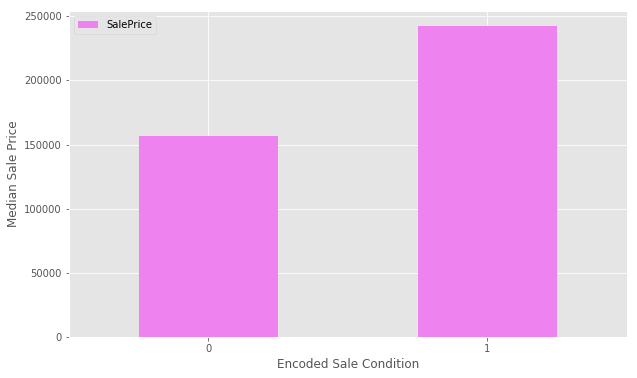

In [18]:
def encode(x): return 1 if x == "Partial" else 0
train["EncCondition"] = train.SaleCondition.apply(encode)
test["EncCondition"] = test.SaleCondition.apply(encode)

condition_pivot = train.pivot_table(index="EncCondition", values="SalePrice", aggfunc=np.median)
condition_pivot.plot(kind="bar", color="violet")
plt.xlabel("Encoded Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=0)
plt.show()

In [19]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
print(sum(data.isnull().sum() != 0))

0


In [20]:
y = np.log(train.SalePrice)
X = data.drop(["SalePrice", "Id"], axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [22]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [23]:
print("r^2 is:", model.score(X_test, y_test))

r^2 is: 0.8882477709262531


In [24]:
predictions = model.predict(X_test)
print("RMSE is:", mean_squared_error(y_test, predictions))

RMSE is: 0.01784179451956794


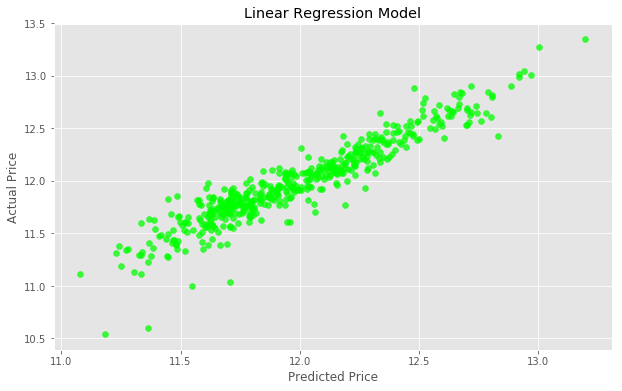

In [25]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75, color="lime")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Linear Regression Model")
plt.show()

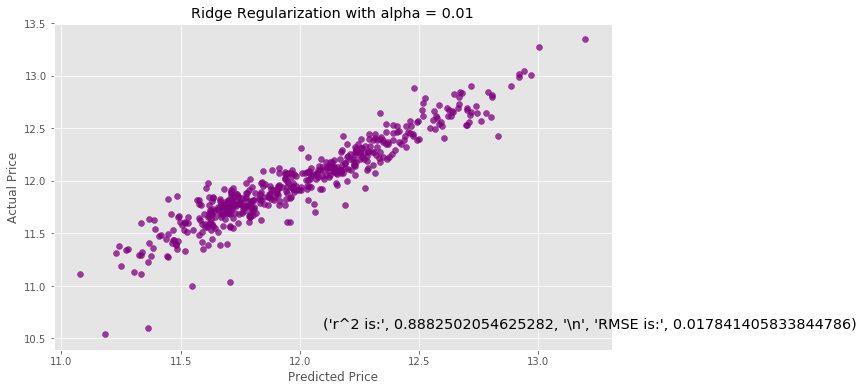

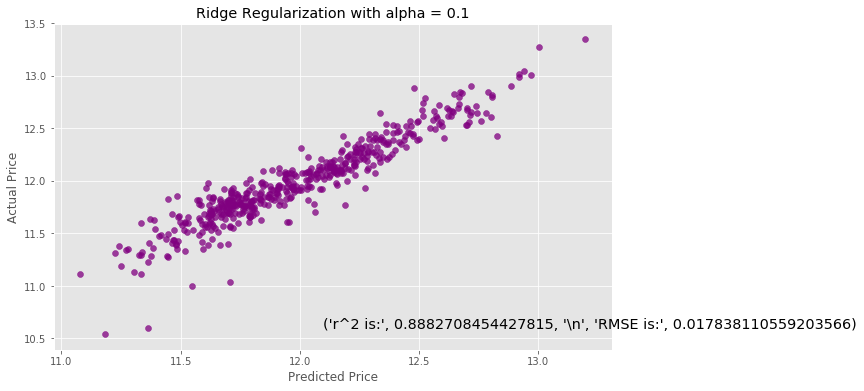

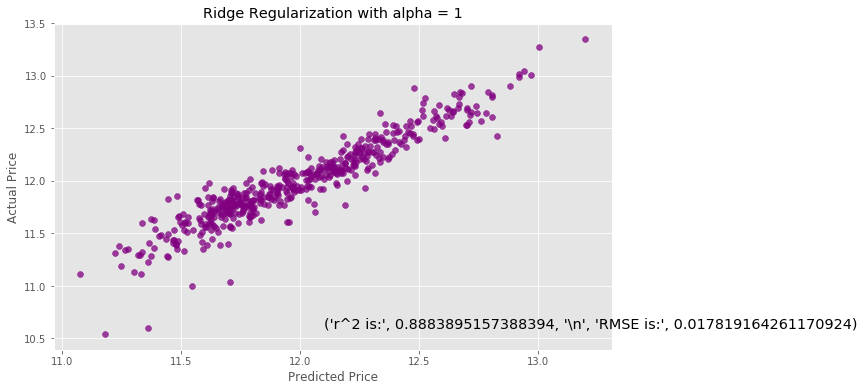

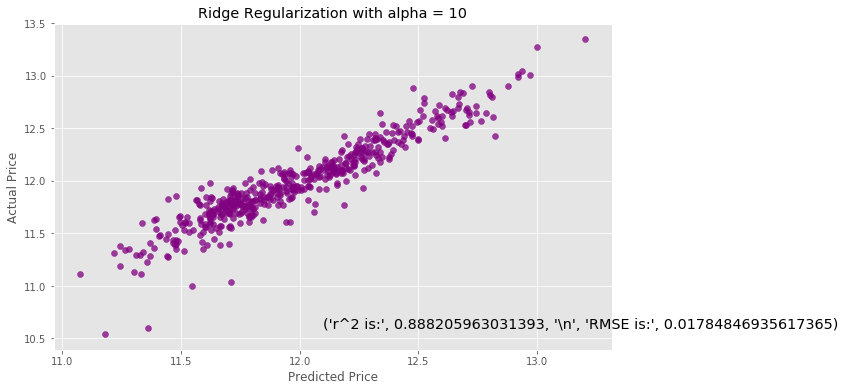

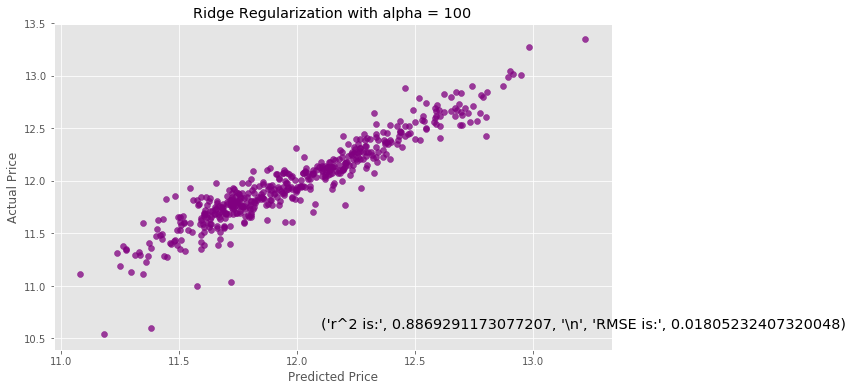

In [26]:
for i in range(-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    pred_ridge = ridge_model.predict(X_test)
    
    plt.scatter(pred_ridge, actual_values, alpha=.75, color="purple")
    plt.xlabel("Predicted Price")
    plt.ylabel("Actual Price")
    plt.title("Ridge Regularization with alpha = {}".format(alpha))
              
    overlay = "r^2 is:", ridge_model.score(X_test, y_test), "\n", "RMSE is:", mean_squared_error(y_test, pred_ridge)
    plt.annotate(s=overlay, xy=(12.1,10.6), size="x-large")
    plt.show()

In [27]:
submission = pd.DataFrame()
submission["Id"] = test.Id

features = test.select_dtypes(include=[np.number]).drop(["Id"], axis=1).interpolate()
predictions = model.predict(features)
final_pred = np.exp(predictions)

In [28]:
print("Original Predictions are:\n", predictions[:10], "\n")
print("Final Predictions are:\n", final_pred[:10])

Original Predictions are:
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655 12.05709882
 12.16036698 12.01665734 12.17126892 11.66318882] 

Final Predictions are:
 [128959.49172585 122920.74024358 175704.82598102 200050.83263755
 182075.46986405 172318.33397533 191064.621642   165488.55901671
 193158.99133191 116214.02546462]


In [29]:
submission["SalePrice"] = final_pred
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [30]:
submission.to_csv("submission.csv", index=False)